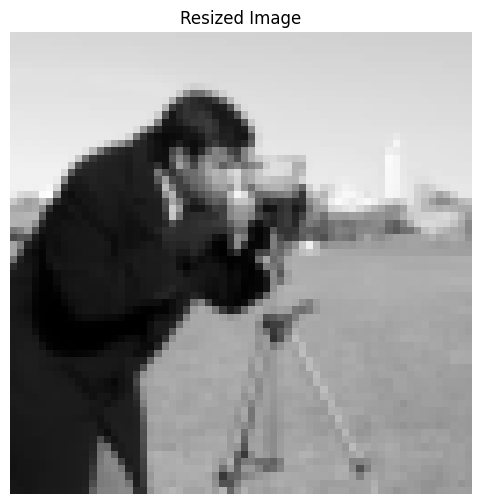

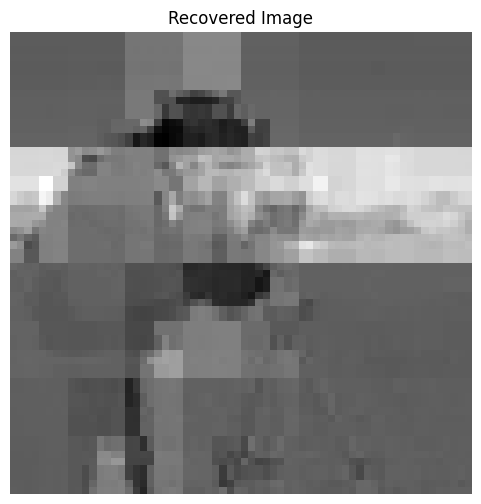

In [6]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from skimage import data
from skimage.transform import resize

# Load and resize the image
original_image = data.camera()
resized_image = resize(original_image, (64, 64), anti_aliasing=True)

plt.figure(figsize=(6, 6))
plt.imshow(resized_image, cmap='gray')
plt.title('Resized Image')
plt.axis('off')
plt.show()

# Perform Wavelet Transform
coeffs = pywt.wavedec2(resized_image, wavelet='haar', level=4)
coeffs_flat, coeffs_slices = pywt.coeffs_to_array(coeffs)

# Simulate Compressed Sensing by creating a mask to select a fraction of coefficients
# Instead of applying the mask directly, we'll adjust our approach
fraction_of_coefficients_to_keep = 0.5
total_coefficients = len(coeffs_flat)
number_of_coefficients_to_keep = int(np.floor(fraction_of_coefficients_to_keep * total_coefficients))

# Generate a random sample of indices to keep
indices_to_keep = np.random.choice(range(total_coefficients), number_of_coefficients_to_keep, replace=False)
mask = np.zeros(total_coefficients, dtype=bool)
mask[indices_to_keep] = True

# Apply the mask to simulate compressed sensing
compressed_coeffs_flat = np.zeros_like(coeffs_flat)
compressed_coeffs_flat[indices_to_keep] = coeffs_flat[indices_to_keep]

# For the purpose of this simplified example, we'll assume that the "recovery" process is able to perfectly recover the coefficients
# This is a significant simplification and not reflective of actual compressed sensing recovery processes

# Convert the "recovered" flat coefficients back to the wavelet coefficient structure
recovered_coeffs = pywt.array_to_coeffs(compressed_coeffs_flat, coeffs_slices, output_format='wavedec2')
recovered_image = pywt.waverec2(recovered_coeffs, wavelet='haar')

# Display the recovered image
plt.figure(figsize=(6, 6))
plt.imshow(recovered_image, cmap='gray')
plt.title('Recovered Image')
plt.axis('off')
plt.show()


